In [335]:
import pandas as pd
import numpy as np
import ast

### Prepare weight data

In [336]:
def keep_weight_post_infection(x,weight_end = "weight_T13"):
    """
    Given a DataFrame `x`, returns a Series containing the weights post-infection.

    *Arguments*
    - x: DataFrame containing the data.
    - weight_end: Column name of the last weight measurement.

    *Returns*
    - shifted_series: Series containing the weights post-infection.
    """
    # Extract relevant columns from the DataFrame
    dates = x['Dates']
    t_infection = x['Time_infection']
    datas = x['weight_T_infection':weight_end]

    # Find the date closest to the infection time
    new_time_infection = dates[dates <= t_infection][-1]
    location_of_TI = dates.get_loc(new_time_infection)

    # Return the original series if the data at the infection time is NaN
    if np.isnan(datas[location_of_TI]):
        return datas
    
    # Shift the values of the input series by the specified index
    shifted_series = pd.Series([np.nan] * len(datas), index=datas.index)
    if location_of_TI == 0:
        return datas
    else:
        shifted_series[:-location_of_TI] = datas.values.tolist()[location_of_TI:]
    # Shift the values of the input series by the specified index
    return shifted_series

In [337]:
df = pd.read_excel("./data/df_for_analysis.xlsx",index_col=0)

In [338]:
# change dates column to datetimindex and transform weight datas to numeric only
df.loc[:,"weight_T_infection":"weight_T13"] = df.loc[:,"weight_T_infection":"weight_T13"].apply(pd.to_numeric,errors='coerce')
serie_dates = df['Time_point'].apply(lambda x: pd.to_datetime(x.split(','),dayfirst=True))
df['Dates'] = serie_dates
data = df.apply(lambda x: keep_weight_post_infection(x),axis=1)
data

C:\Users\ma7054\AppData\Local\Temp\ipykernel_18336\2938565056.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,"weight_T_infection":"weight_T13"] = df.loc[:,"weight_T_infection":"weight_T13"].apply(pd.to_numeric,errors='coerce')


,weight_T_infection,weight_T1,weight_T2,weight_T3,weight_T4,weight_T5,weight_T6,weight_T7,weight_T8,weight_T9,weight_T10,weight_T11,weight_T12,weight_T13
0,23.92,21.72,20.96,19.38,18.16,16.44,15.49,15.44,15.05,NaN,NaN,NaN,NaN,NaN
1,21.40,19.45,18.84,17.82,16.80,15.02,14.14,14.40,14.73,NaN,NaN,NaN,NaN,NaN
2,22.56,21.45,20.83,18.67,16.82,15.30,14.74,14.80,14.42,NaN,NaN,NaN,NaN,NaN
3,20.39,18.69,16.60,15.58,14.17,13.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23.72,21.74,20.29,19.56,18.50,16.80,16.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,27.70,25.00,22.80,21.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2353,26.10,24.90,22.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2354,24.60,25.80,25.70,24.90,22.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2355,27.40,27.30,28.20,27.80,27.70,27.80,27.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [339]:
normalize = data.div(data['weight_T_infection'],axis=0)*100
df_normalize = df.copy()
df_normalize.loc[:,"weight_T_infection":"weight_T13"] = normalize
df_normalize

,Mouse_ID,ID_Experiment,Cage,Strain,Date,Experiment,Group,Group_info,H0,Pre_traitment,...,survival_0.07,time_0.06,survival_0.06,time_0.05,survival_0.05,time_original,survival_original,max_loss_weight_percentage,exp,sub_exp
0,TRO-05432,ID_001,A,BALB/cByJ,2014-06-05,Candida/Propionate,1A,Propionate / 2*10^5,1,propionate,...,1,1.5,1,1.5,1,9.0,1,0.629181,1,A
1,TRO-05433,ID_001,A,BALB/cByJ,2014-06-05,Candida/Propionate,1A,Propionate / 2*10^5,1,propionate,...,1,1.5,1,1.5,1,9.0,1,0.660748,1,A
2,TRO-05434,ID_001,A,BALB/cByJ,2014-06-05,Candida/Propionate,1A,Propionate / 2*10^5,1,propionate,...,1,2.5,1,2.5,1,9.0,1,0.639184,1,A
3,TRO-05435,ID_001,A,BALB/cByJ,2014-06-05,Candida/Propionate,1A,Propionate / 2*10^5,1,propionate,...,1,1.5,1,1.5,1,6.0,1,0.664051,1,A
4,TRO-05456,ID_001,B,BALB/cByJ,2014-06-05,Candida/Propionate,1A,Propionate / 2*10^5,1,propionate,...,1,1.5,1,1.5,1,7.0,1,0.707420,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,TRO-028337,ID_096,ETRO-01911,C57BL/6J,2023-03-03,Pneumococcus/Training/Cross-fostering/male,3,D. Zy-Zy,1,training/cross-fostering,...,1,1.5,1,1.5,1,5.0,1,0.761733,3,no
2353,TRO-028338,ID_096,ETRO-01911,C57BL/6J,2023-03-03,Pneumococcus/Training/Cross-fostering/male,3,D. Zy-Zy,1,training/cross-fostering,...,1,2.5,1,2.5,1,4.0,1,0.865900,3,no
2354,TRO-028339,ID_096,ETRO-01911,C57BL/6J,2023-03-03,Pneumococcus/Training/Cross-fostering/male,3,D. Zy-Zy,1,training/cross-fostering,...,1,5.5,1,5.5,1,6.0,1,0.926829,3,no
2355,TRO-028342,ID_096,ETRO-01911,C57BL/6J,2023-03-03,Pneumococcus/Training/Cross-fostering/male,3,D. Zy-Zy,1,training/cross-fostering,...,0,8.0,0,8.0,0,8.0,0,0.996350,3,no


### Filter data that don't have scores

In [340]:
df_normalize['Score_list'] = df_normalize['Scores'].apply(lambda x: ast.literal_eval(x) if ast.literal_eval(x) else np.nan)
df_normalize = df_normalize[df_normalize['Score_list'].notna()]
df_normalize['Score_list'] = df_normalize['Score_list'].apply(lambda x: np.nan if sum(x) == 0 else x)
df_normalize = df_normalize[df_normalize['Score_list'].notna()]

C:\Users\ma7054\AppData\Local\Temp\ipykernel_18336\3204997700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalize['Score_list'] = df_normalize['Score_list'].apply(lambda x: np.nan if sum(x) == 0 else x)


In [341]:
# Expand the list of scores into separate columns
scores_df = pd.DataFrame(df_normalize['Score_list'].tolist(), index=df_normalize.index)

# Create column names for the new columns
scores_df.columns = [f'Score_{i}' for i in range(scores_df.shape[1])]

# Concatenate the original DataFrame with the new columns
df_expanded = pd.concat([df_normalize.drop('Scores', axis=1), scores_df], axis=1)

df_expanded



,Mouse_ID,ID_Experiment,Cage,Strain,Date,Experiment,Group,Group_info,H0,Pre_traitment,...,Score_7,Score_8,Score_9,Score_10,Score_11,Score_12,Score_13,Score_14,Score_15,Score_16
858,TRO-18673,ID_032,ETRO-01107,C57BL/6J Sirt2 WT,2018-10-16,Listeria/SIRT5/Sub-lethal,0,WT,0,no,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859,TRO-18674,ID_032,ETRO-01107,C57BL/6J Sirt2 WT,2018-10-16,Listeria/SIRT5/Sub-lethal,0,WT,0,no,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
860,TRO-18675,ID_032,ETRO-01108,C57BL/6J Sirt2 WT,2018-10-16,Listeria/SIRT5/Sub-lethal,0,WT,0,no,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
861,TRO-18676,ID_032,ETRO-01108,C57BL/6J Sirt2 WT,2018-10-16,Listeria/SIRT5/Sub-lethal,0,WT,0,no,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862,TRO-18677,ID_032,ETRO-01108,C57BL/6J Sirt2 WT,2018-10-16,Listeria/SIRT5/Sub-lethal,0,WT,0,no,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,TRO-028337,ID_096,ETRO-01911,C57BL/6J,2023-03-03,Pneumococcus/Training/Cross-fostering/male,3,D. Zy-Zy,1,training/cross-fostering,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2353,TRO-028338,ID_096,ETRO-01911,C57BL/6J,2023-03-03,Pneumococcus/Training/Cross-fostering/male,3,D. Zy-Zy,1,training/cross-fostering,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2354,TRO-028339,ID_096,ETRO-01911,C57BL/6J,2023-03-03,Pneumococcus/Training/Cross-fostering/male,3,D. Zy-Zy,1,training/cross-fostering,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2355,TRO-028342,ID_096,ETRO-01911,C57BL/6J,2023-03-03,Pneumococcus/Training/Cross-fostering/male,3,D. Zy-Zy,1,training/cross-fostering,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Transform to tidy data

In [342]:
weight_columns = df_expanded.loc[:,"weight_T_infection":"weight_T13"].columns.tolist()
score_columns  = df_expanded.loc[:,'Score_0':'Score_13'].columns.tolist()

columns_index_time = ['ID_Experiment','Mouse_ID','Date','Infection','Group','exp','survival_original']

In [343]:
weights_melted = df_expanded.melt(id_vars=columns_index_time, value_vars=weight_columns, var_name='Time', value_name='Weight')
scores_melted = df_expanded.melt(id_vars=columns_index_time, value_vars=score_columns, var_name='Time', value_name='Score')

#### Uniform value of Time

In [344]:
name_weight = ["weight_T_infection"] + [f'weight_T{i+1}' for i in range(13)]
weight_mapping = dict(zip(name_weight,[f"T{i}" for i in range(14)]))
weights_melted['Time'] = weights_melted['Time'].replace(weight_mapping)

In [345]:
score_mapping = dict(zip(scores_melted['Time'].unique().tolist(),[f"T{i}" for i in range(14)]))
scores_melted['Time'] = scores_melted['Time'].replace(score_mapping)

In [346]:
columns_index_time_tidy = columns_index_time + ['Time']
tidy_df = pd.merge(weights_melted, scores_melted)
tidy_df

,ID_Experiment,Mouse_ID,Date,Infection,Group,exp,survival_original,Time,Weight,Score
0,ID_032,TRO-18673,2018-10-16,Listeria,0,0,0,T0,100.0,0.0
1,ID_032,TRO-18674,2018-10-16,Listeria,0,0,0,T0,100.0,0.0
2,ID_032,TRO-18675,2018-10-16,Listeria,0,0,0,T0,100.0,0.0
3,ID_032,TRO-18676,2018-10-16,Listeria,0,0,0,T0,100.0,0.0
4,ID_032,TRO-18677,2018-10-16,Listeria,0,0,0,T0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20085,ID_096,TRO-028337,2023-03-03,S. pneumoniae,3,3,1,T13,NaN,NaN
20086,ID_096,TRO-028338,2023-03-03,S. pneumoniae,3,3,1,T13,NaN,NaN
20087,ID_096,TRO-028339,2023-03-03,S. pneumoniae,3,3,1,T13,NaN,NaN
20088,ID_096,TRO-028342,2023-03-03,S. pneumoniae,3,3,0,T13,NaN,NaN


### Correlation Plot

In [347]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [348]:
tidy_df['Score'] = tidy_df['Score'].apply(lambda x: 8 if x > 8 else x)

In [349]:
def find_min_max_per_infection(df,infection='Listeria'):
    df_infection = df[df['Infection']==infection]
    max_score = df_infection.groupby('Mouse_ID')['Score'].max()
    min_weight = df_infection.groupby('Mouse_ID')['Weight'].min()
    df_min_max =  pd.merge(max_score,min_weight,on='Mouse_ID')
    return df_min_max

In [350]:
def plot_regression(df,name='Infection_type',save=False,show=False,path_to_save='scatter_'):
    r, p = sp.stats.pearsonr(df['Score'], df['Weight'])
    
    p = "{:.2e}".format(p)
    # A4 page dimensions in inches
    a4_width_in_inches = 8.27
    a4_height_in_inches = 11.69

    # Calculate the width and height of the figure for a nice ratio
    ratio = 1.41  # sqrt
    fig_width = a4_width_in_inches * 1.2  # 80% of A4 width
    fig_height = fig_width / ratio

    
    palette = sns.color_palette("colorblind")
    #palette[0] = palette[2]
    
    #ANNOTATION
    fig, ax = plt.subplots(figsize=(fig_width,fig_height))

    sns.regplot(data=df,
    ax=ax,
    x='Score',y='Weight',
    label=(f"correlation: r={round(r,2)}, p={p}\n{name}"))

    fig.subplots_adjust(bottom=0.15)  # Adjust the bottom margin
    

    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.legend()
    plt.xlabel('', fontsize=25)
    plt.ylabel('Percent of initial weight', fontsize=25)
    plt.title("",fontsize=10,style='italic')
    plt.ylim(55, 110)
    if save:
        plt.savefig(path_to_save+name+".png")

    if show:
        plt.show()

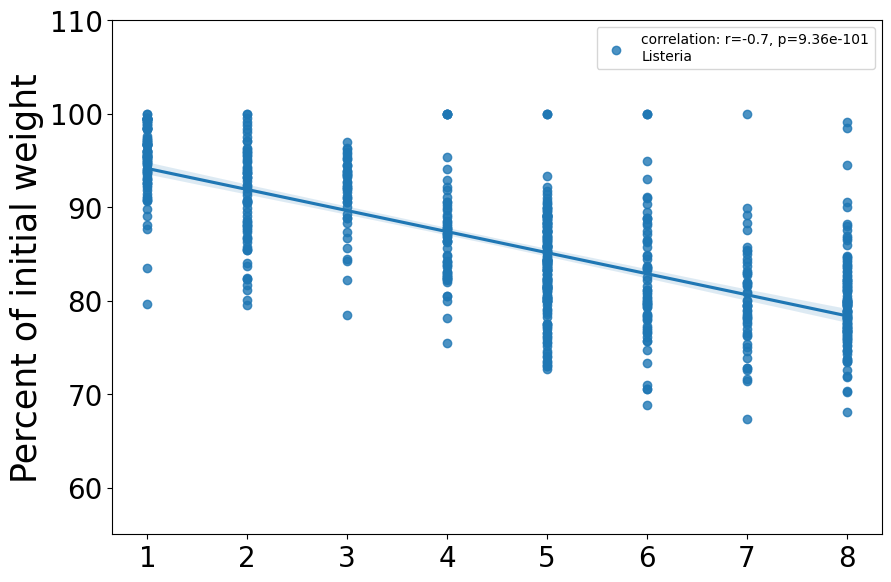

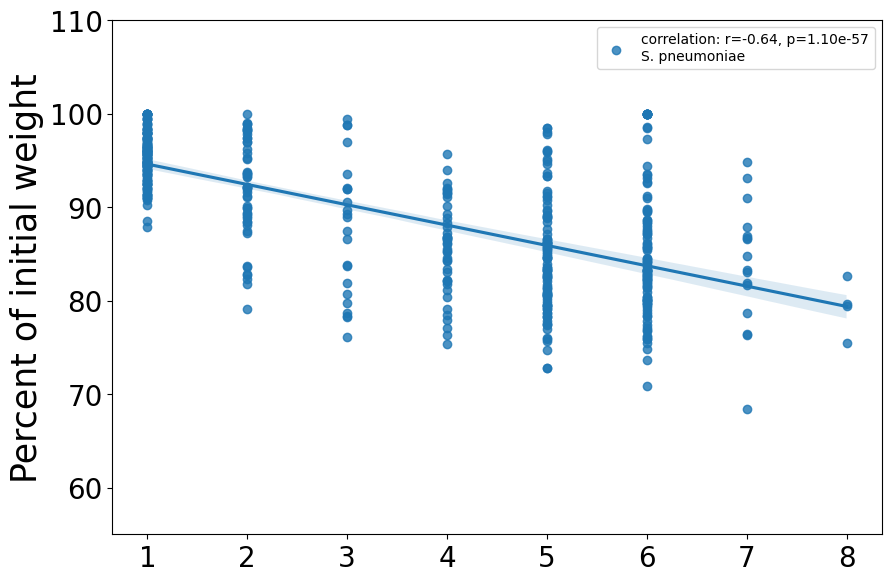

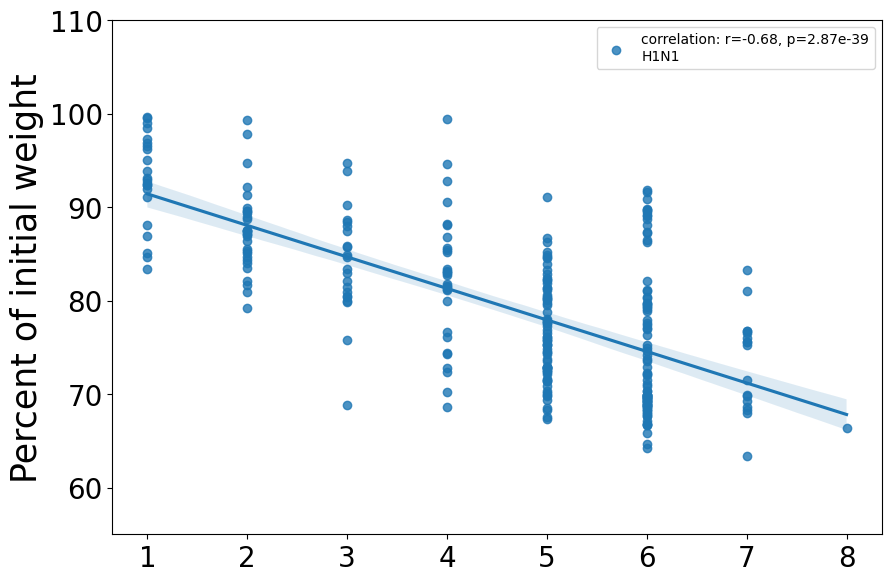

In [351]:
import scipy as sp
for infection in tidy_df['Infection'].unique().tolist():
    df_infection = find_min_max_per_infection(tidy_df,infection)
    plot_regression(df_infection,infection,path_to_save='plots/regression/',save=True)
    